<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/DataProcessing3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import read_csv

dataset = read_csv('drive/My Drive/InvertPhaseLong2.csv', header=0)

               850nm          640nm  ...  Channel 7  Channel 8
count   20665.000000   20665.000000  ...    20665.0    20665.0
mean   817663.068764 -777540.398306  ...        0.0        0.0
std     26649.696060   13677.458630  ...        0.0        0.0
min         0.000000 -823380.000000  ...        0.0        0.0
25%    808706.000000 -785469.000000  ...        0.0        0.0
50%    826957.000000 -773174.000000  ...        0.0        0.0
75%    834737.000000 -767922.000000  ...        0.0        0.0
max    857234.000000 -752898.000000  ...        0.0        0.0

[8 rows x 8 columns]


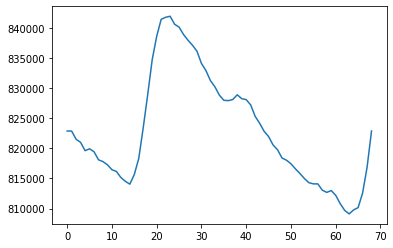

In [2]:
from matplotlib import pyplot

print(dataset.describe())
data = dataset.values
ppg1 = data[:,0]
pyplot.plot(ppg1[1:70])
pyplot.show()

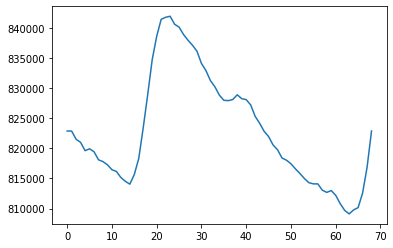

In [3]:
ppg2 = data[:,0]
pyplot.plot(ppg1[1:70])
pyplot.show()

numpy.ndarray

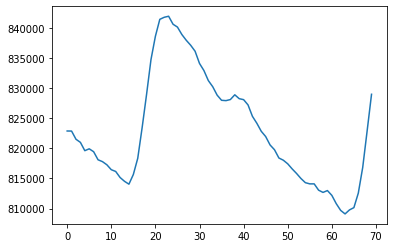

In [4]:
signal = data[:,0]
t = signal[int(1):int(71)];
#a = [x for x in t]
#a = DataFrame.transpose(DataFrame(t))
#s = list()
#s.append(a)
pyplot.plot(t)
type(signal)

# Segment data to N row

In [82]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np

def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data
def segment_data(signal, distance, overlap):
  i = 1;
  s = list()
  while int(i+distance)<len(signal):
    a = signal[int(i):int(i+distance)];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
    s.append(a)
    i = i + distance*overlap
    
  return np.asarray(s) # return a nd array

data = load_data('drive/My Drive/InvertPhaseLong2.csv')  
ppg = segment_data(data[:,0],70,0.5)
ppg1 = segment_data(data[:,2],70,0.5)

data2 = load_data('drive/My Drive/Dataset/longcunDB2.csv') 
ppg2 = segment_data(data2[:,1],70,0.5)
ppg3 = segment_data(data2[:,0],70,0.5) # Positive with noise
s1 = ppg # convert to array
s2 = ppg1 # convert to array
s3 = ppg2 # Noise Data

In [83]:
ppg.shape, ppg2.shape

((589, 70), (589, 70))

(589, 70)

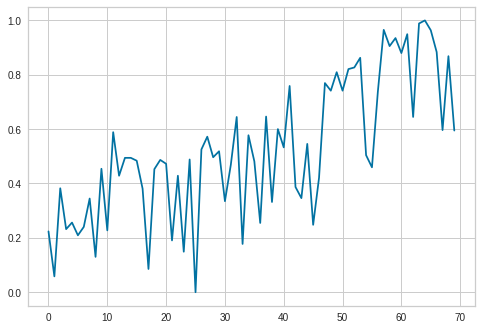

In [84]:
pyplot.plot(X_train[8])
ppg.shape

Prepare Data for Training
- Transform using MinMaxScaler will scaling along array point by point in column
+ Data need to Fist Transpose() -> Apply MinMaxScaler() -> Transpose() back

In [85]:
# label for first group of Data
y1 = [1]*s1.shape[0];
y2 = [0]*s2.shape[0];
y3 = [2]*s3.shape[0];

y1 = np.asarray(y1)
y2 = np.asarray(y2)
y3 = np.asarray(y3)
print((y1.shape, y2.shape, y3.shape))
#ydf1 = DataFrame(y1)
#ydf2 = DataFrame(y2)
# Concatenate data
X = np.concatenate((ppg, ppg1,ppg2))
y = np.concatenate((y1, y2, y3))
print(X.shape)

# rescale data
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
def scaling(signal):
  scaler = MinMaxScaler()
  s_trans = signal.transpose()
  Xscaled = scaler.fit_transform(s_trans)
  Xscaled = Xscaled.transpose()
  return Xscaled  
Xscaled = scaling(X)
Xscaled2 = scaling(ppg2)
Xscaled3 = scaling(ppg3)
#Xscaled = Xscaled.transpose()
#Xscaled2 = scaler.fit_transform(ppg2)
#print(X1T.shape)

((589,), (589,), (589,))
(1767, 70)


In [ ]:
print(y3)

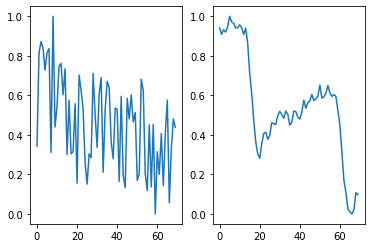

In [10]:
pyplot.subplot(121)
pyplot.plot(Xscaled[1500])
pyplot.subplot(122)
pyplot.plot(Xscaled3[339])
#Xscaled[1:2]

Repearing Data

In [11]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.33, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
X_val = X_val.reshape((X_val.shape[0],X_val.shape[1],1))
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes= 3)
y_val = to_categorical(y_val, num_classes= 3)

In [12]:
print(sum(y_val==1))

[102 104  86]


(1183, 70, 1)


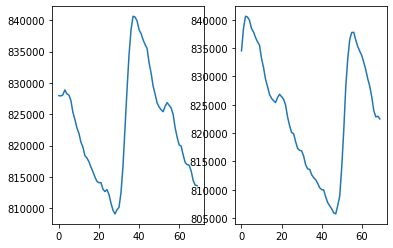

In [ ]:
print(X_train.shape)
pyplot.subplot(121)
pyplot.plot(ppg[1])

pyplot.subplot(122)
pyplot.plot(ppg[2])


pyplot.show()

In [ ]:
# convert ppg to array
import numpy as np
from pandas import DataFrame


df1= DataFrame(s1)
df2= DataFrame(s2)
print(df1.shape)
print(df2.shape)

(589, 70)
(589, 70)


In [ ]:
# check correlate
from pandas import Series

t1 = Series(ppg1[302])
t2 = Series(ppg3[1])
t1.corr(t2, method='pearson')

0.47400187523853426

# Tranining the model

Scaler Data

In [13]:
scaler = MinMaxScaler()
print(scaler.fit(ppg))

MinMaxScaler(copy=True, feature_range=(0, 1))


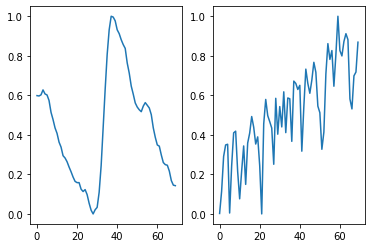

In [14]:
pyplot.subplot(121)
pyplot.plot(Xscaled[1])

pyplot.subplot(122)
pyplot.plot(Xscaled2[302])

In [18]:
# cnn model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

def evaluate_model(trainX, trainy,testX, testy):
  
  model = Sequential()
  #n_timesteps = 70
  #n_features= 1
  #n_outputs=2
  n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
  verbose, epochs, batch_size = 0, 10, 32
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # fit network
  model.fit(trainX, trainy,  epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
  _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
  return model, accuracy

In [19]:
X_train.shape[1], X_train.shape[2], y_train.shape[1]

(70, 1, 3)

In [ ]:
verbose, epochs, batch_size = 0, 10, 32
# fit network
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=batch_size, verbose=1)

In [20]:
from numpy import mean
from numpy import std
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 
def run_experiment(repeats=10):
	
	# repeat experiment
	scores = list()
	for r in range(repeats):
		model,score = evaluate_model(X_train, y_train, X_test, y_test)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
  
	# summarize results
	summarize_results(scores)
  #return model
# run the experiment
run_experiment()

>#1: 99.658
>#2: 98.630
>#3: 99.658
>#4: 98.973
>#5: 98.288
>#6: 99.315
>#7: 99.658
>#8: 99.315
>#9: 99.315
>#10: 99.658
[99.65753555297852, 98.63013625144958, 99.65753555297852, 98.97260069847107, 98.2876718044281, 99.31507110595703, 99.65753555297852, 99.31507110595703, 99.31507110595703, 99.65753555297852]
Accuracy: 99.247% (+/-0.454)


[0. 1. 0.]


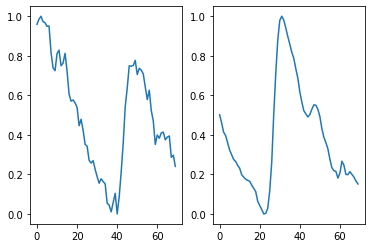

In [21]:
x = X_val[5]
pyplot.subplot(121)
pyplot.plot(x)
print(y_val[6])
pyplot.subplot(122)
pyplot.plot(X_val[6])

[1. 0. 0.]


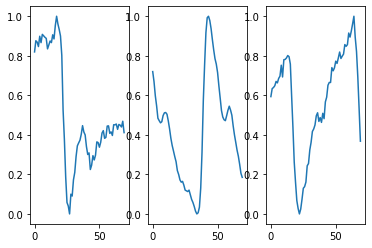

In [22]:
x = Xscaled3[9]
pyplot.subplot(131)
pyplot.plot(x)
print(y_val[61])
pyplot.subplot(132)
pyplot.plot(Xscaled[135])
pyplot.subplot(133)
pyplot.plot(Xscaled3[63])

In [ ]:
print(y_val)

In [24]:
model,score = evaluate_model(X_train, y_train, X_test, y_test)
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 68, 64)            256       
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 66, 64)            12352     
_________________________________________________________________
dropout_10 (Dropout)         (None, 66, 64)            0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 33, 64)            0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 2112)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               211300    
_________________________________________________________________
dense_21 (Dense)             (None, 3)               

In [ ]:
s = Xscaled3[63].reshape((1,Xscaled3.shape[1],1))
a = model.predict(s)
print(a)
a = np.around(a)
print(a)

In [ ]:
result = list()
for s in Xscaled3:
  s = s.reshape((1,Xscaled3.shape[1],1))
  a = model.predict(s)
  result.append(a)

In [ ]:
result

# Tune 1D Convolutional Neural Network


*   Data Preparation
*   Number of Filters
*   Size of Kernel






# Number of Filters

In [ ]:
n_params = [8, 16, 32, 64, 128, 256]

In [ ]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, n_filters):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(filters=n_filters, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=n_filters, kernel_size=3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = mean(scores[i]), std(scores[i])
		print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_filters.png')
 
def run_experiment(params, repeats=10):
	# load data
	#X_train, y_train, X_test, y_test = load_dataset()
	# test each parameter
	all_scores = list()
	for p in params:
		# repeat experiment
		scores = list()
		for r in range(repeats):
			score = evaluate_model(X_train, y_train, X_test, y_test, p)
			score = score * 100.0
			print('>p=%d #%d: %.3f' % (p, r+1, score))
			scores.append(score)
		all_scores.append(scores)
	# summarize results
	summarize_results(all_scores, params)
 
n_params = [8, 16, 32, 64, 128, 256]
run_experiment(n_params)

NameError: ignored

# Size of Kernel

>p=2 #1: 98.973
>p=2 #2: 99.315
>p=2 #3: 99.315
>p=2 #4: 99.315
>p=2 #5: 99.315
>p=2 #6: 98.973
>p=2 #7: 98.288
>p=2 #8: 98.973
>p=2 #9: 98.973
>p=2 #10: 99.315
>p=3 #1: 99.315
>p=3 #2: 99.315
>p=3 #3: 99.658
>p=3 #4: 99.315
>p=3 #5: 99.658
>p=3 #6: 99.315
>p=3 #7: 99.315
>p=3 #8: 99.658
>p=3 #9: 99.315
>p=3 #10: 99.315
>p=5 #1: 99.658
>p=5 #2: 99.658
>p=5 #3: 99.658
>p=5 #4: 99.315
>p=5 #5: 99.658
>p=5 #6: 100.000
>p=5 #7: 99.658
>p=5 #8: 98.973
>p=5 #9: 99.658
>p=5 #10: 99.315
>p=7 #1: 99.315
>p=7 #2: 99.658
>p=7 #3: 100.000
>p=7 #4: 100.000
>p=7 #5: 100.000
>p=7 #6: 100.000
>p=7 #7: 100.000
>p=7 #8: 100.000
>p=7 #9: 99.315
>p=7 #10: 99.658
>p=11 #1: 100.000
>p=11 #2: 100.000
>p=11 #3: 100.000
>p=11 #4: 100.000
>p=11 #5: 100.000
>p=11 #6: 100.000
>p=11 #7: 100.000
>p=11 #8: 100.000
>p=11 #9: 100.000
>p=11 #10: 100.000
[[98.97260069847107, 99.31507110595703, 99.31507110595703, 99.31507110595703, 99.31507110595703, 98.97260069847107, 98.2876718044281, 98.97260069847107, 98.972600698471

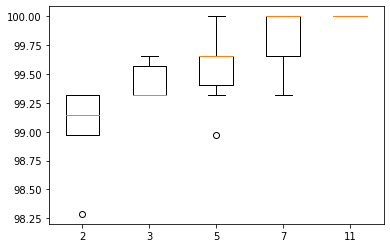

In [ ]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, n_kernel):
	verbose, epochs, batch_size = 0, 15, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=n_kernel, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=n_kernel, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy
# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = mean(scores[i]), std(scores[i])
		print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
# run an experiment
def run_experiment(params, repeats=10):
	# load data
	# test each parameter
	all_scores = list()
	for p in params:
		# repeat experiment
		scores = list()
		for r in range(repeats):
			score = evaluate_model(X_train, y_train, X_test, y_test, p)
			score = score * 100.0
			print('>p=%d #%d: %.3f' % (p, r+1, score))
			scores.append(score)
		all_scores.append(scores)
	# summarize results
	summarize_results(all_scores, params)
 
# run the experiment
n_params = [2, 3, 5, 7, 11]
run_experiment(n_params)

# import dataset second

In [ ]:
dataset2 = read_csv('drive/My Drive/Dataset/longcunDB2.csv', header=0)

               850nm          640nm  ...  Channel 7  Channel 8
count   20672.000000   20672.000000  ...    20672.0    20672.0
mean   884406.325077 -723318.435468  ...        0.0        0.0
std     43690.243835    6062.724870  ...        0.0        0.0
min    703142.000000 -733902.000000  ...        0.0        0.0
25%    854530.000000 -727704.500000  ...        0.0        0.0
50%    900695.500000 -724696.000000  ...        0.0        0.0
75%    917175.250000 -719469.000000  ...        0.0        0.0
max    937150.000000 -708694.000000  ...        0.0        0.0

[8 rows x 8 columns]


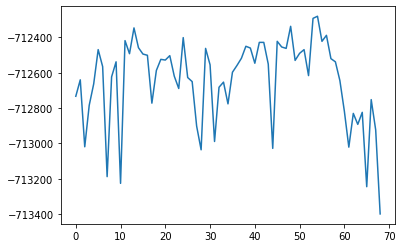

In [ ]:
from matplotlib import pyplot

print(dataset2.describe())
data2 = dataset2.values
ppg2 = data2[:,1]
pyplot.plot(ppg1[1:70])
pyplot.show()

# K-Fold Cross Validation

In [86]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

num_folds = 10
SEED = 34
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

Xrsh = X_train
yrsh = y_train
# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []
fold_no = 1
for train, test in kfold.split(Xrsh, yrsh):
  # Build the model
  verbose, epochs, batch_size = 0, 15, 64
  n_timesteps, n_features, n_outputs = Xrsh.shape[1], Xrsh.shape[2], yrsh.shape[1]
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  # Fit data to model
  history = model.fit(Xrsh[train], yrsh[train], epochs=epochs, batch_size=batch_size, verbose=verbose)
  
  # Generate generalization metrics
  scores = model.evaluate(Xrsh[test], yrsh[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')






------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.011172926984727383; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.01943736895918846; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.03507813438773155; accuracy of 98.31932783126831%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.019471658393740654; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.0132053904235363; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.022159375250339508; accuracy of 100.0%
--------

In [32]:
model.evaluate(X_test, y_test, verbose=1)

10/10 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9932


[0.0202975831925869, 0.9931507110595703]

# Cross validation and plot training process

In [87]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/30
15/15 [==============================] - 0s 6ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 2/30
15/15 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 3/30
15/15 [==============================] - 0s 5ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 0.9958
Epoch 4/30
15/15 [==============================] - 0s 5ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 0.9958
Epoch 5/30
15/15 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 0.9958
Epoch 6/30
15/15 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 7/30
15/15 [==============================] - 0s 5ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9958
Epoch 8/30
15/15 [==

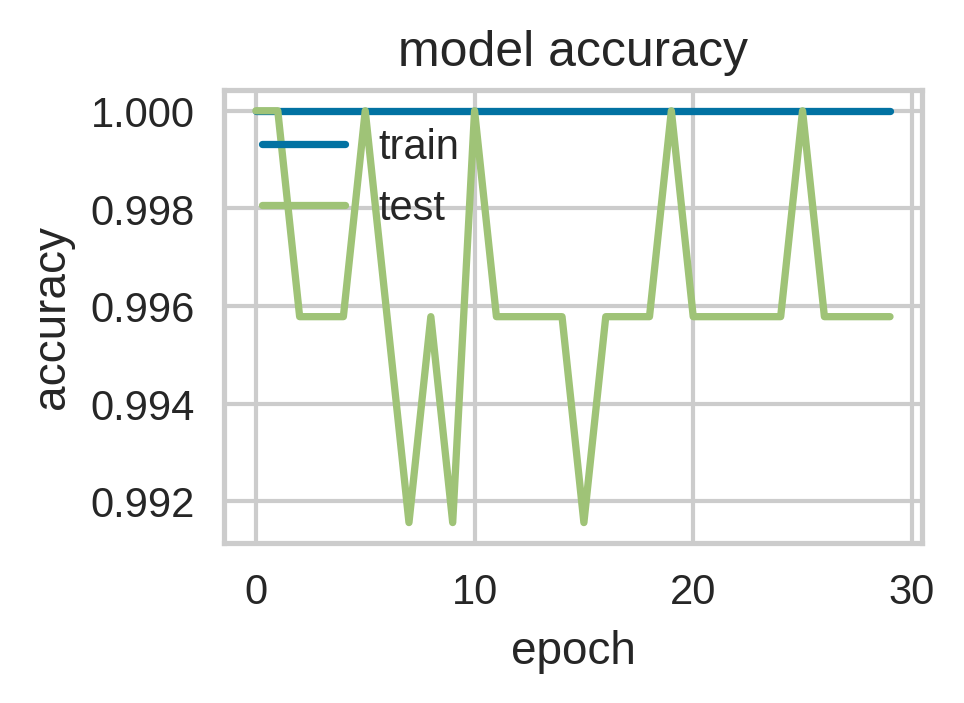

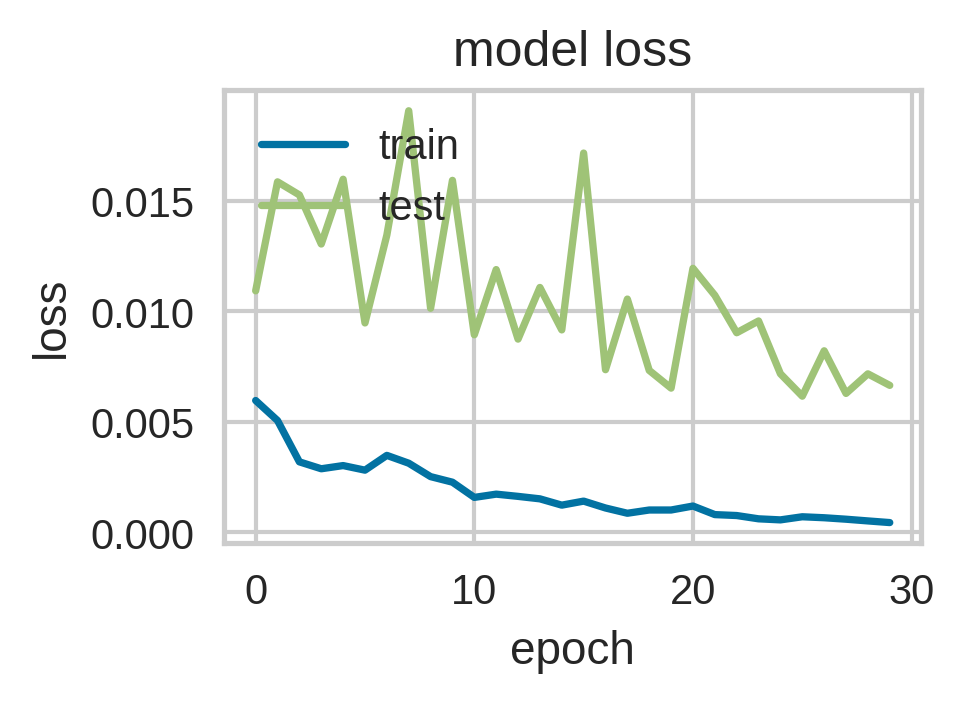

In [116]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3,2),dpi=300)
ax = fig.add_subplot(111)
# summarize history for accuracy
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
ax.legend(['train', 'test'], loc='upper left')
plt.show()

fig = plt.figure(figsize=(3,2),dpi=300)
ax = fig.add_subplot(111)
# summarize history for loss
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax.legend(['train', 'test'], loc='upper left')
plt.show()

# Confuse Matrix For Classification

In [89]:
#Convert array of predict to scale number [1, 0, 0]: 0; [0, 1, 0]: 1; [0, 0, 1]: 2;
import numpy as np 

y_pred= np.round(np.clip(model.predict(X_test), 0, 1))
def mapping(y_pred):
  
  y_map = list()
  for x in y_pred:
    if (x == [1, 0, 0,]).all():
      y_map.append(0)
    elif (x == [0, 1, 0]).all():
      y_map.append(1)
    else:
      y_map.append(2)

  return y_map

y_mpred = mapping(y_pred)
y_mtest = mapping(y_test)


[[ 98   0   0]
 [  0  85   2]
 [  0   0 107]]


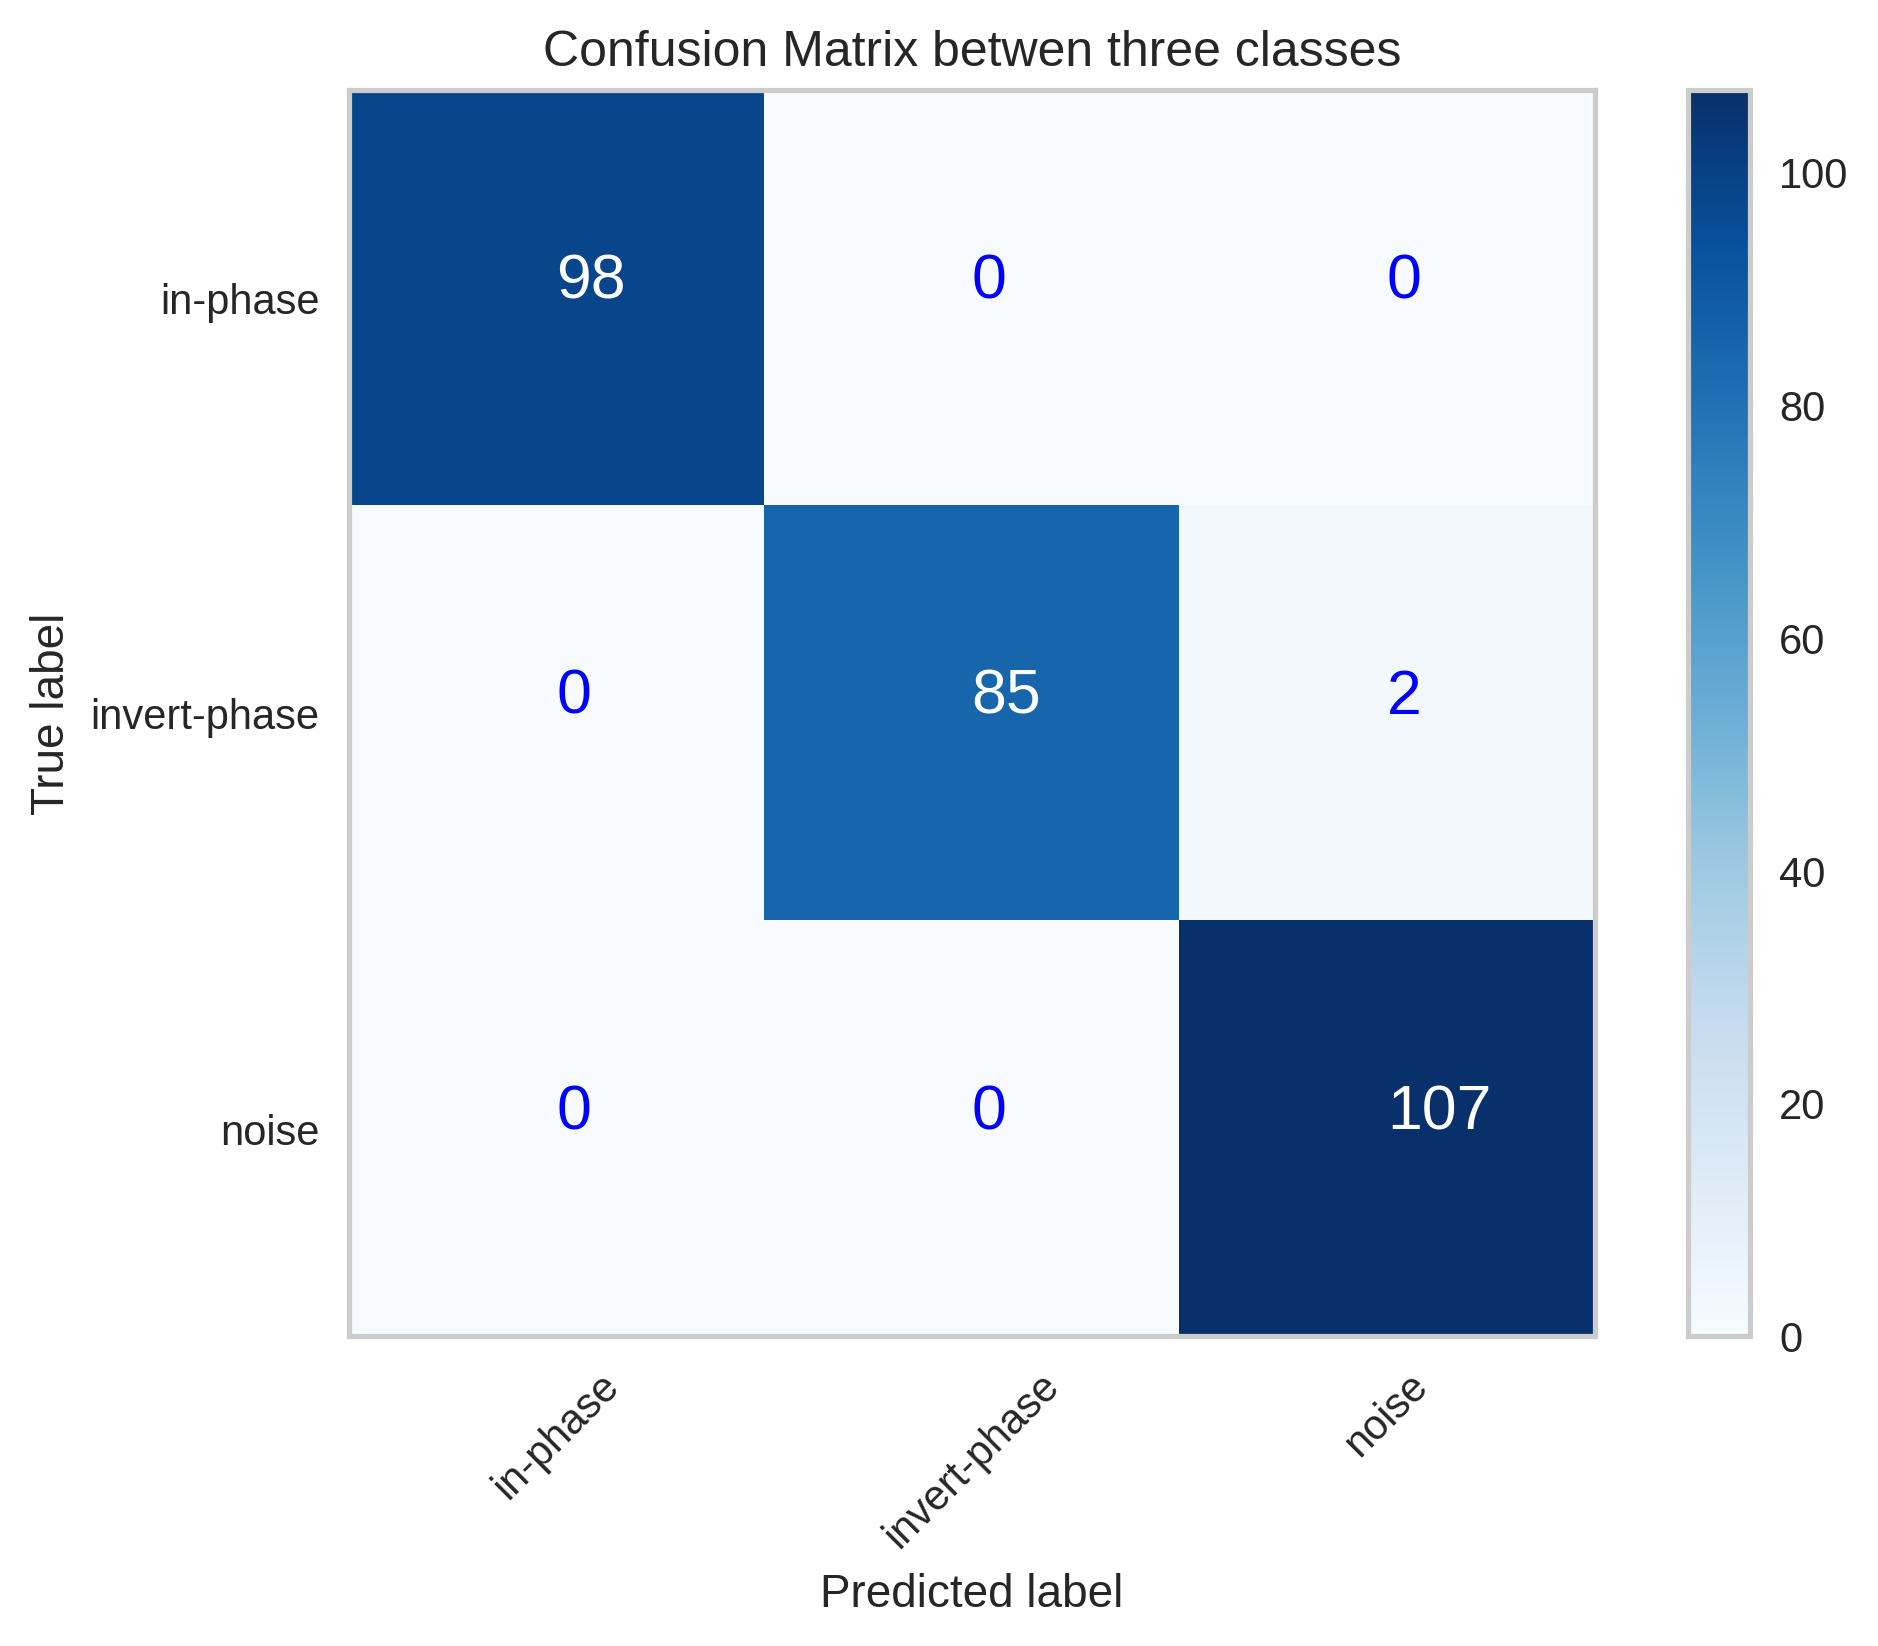

In [115]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np 
# making prediction
##y_pred = model.predict(X_test)
#y_pred= np.round(np.clip(model.predict(X_test), 0, 1))
# confuse matrix
cm = confusion_matrix(y_mtest,y_mpred)
print(cm)

# setup figure
#fig = plt.figure(figsize=(8,4),dpi=300)
#ax = fig.add_subplot(111)
plt.figure(dpi=300)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues) #Wistia

class_names = ["in-phase", "invert-phase","noise"]
plt.title('Confusion Matrix betwen three classes')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
#s = [['TN','FP'], ['FN', 'TP']]
for i in range(cm.shape[1]):
    for j in range(cm.shape[1]):
        if i==j:
          plt.text(j,i, str(cm[i][j]),fontsize=15, color="white")
        else:
          plt.text(j,i, str(cm[i][j]),fontsize=15, color="blue")
#plt.axis(off)
plt.grid(b=None)
plt.colorbar()
plt.show()


In [ ]:
y_pred